**Importing Libraries**

Importing libraries to increase functionality- TensorFlow for deep learning framework, Numpy for array processing, Seaborn and Matplotlib for graphing, etc.

In [ ]:
# Importing Necessary Libraries
import google
import numpy
import pandas
import random
import seaborn
import os
import tensorflow
import sklearn
import tqdm
import matplotlib

**Kaggle API Authentication**

Authenticating Kaggle API using the kaggle.json file to allow dataset downloads directly from Kaggle.

In [ ]:
# Kaggle API Authentication
!pip install -q kaggle
google.colab.files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
kaggle.json


#Loading the Dataset

**Downloading and Unzipping The Dataset**

Using the Kaggle API, I am able to download and unzip the MIT-BIH Arrythmia dataset.

In [ ]:
# Downloading and Unzipping The Dataset
!kaggle datasets download -d shayanfazeli/heartbeat
!unzip -q heartbeat.zip

 92% 91.0M/98.8M [00:01<00:00, 56.1MB/s]
100% 98.8M/98.8M [00:01<00:00, 54.0MB/s]


**Initializing the Dataset**

Extracting data from MIT-BIH Arrythmia dataset and buffering it into a Pandas DataFrame.

In [ ]:
# Initializing the Dataset
dataset = pandas.concat([pandas.read_csv("/content/mitbih_train.csv", header = None), pandas.read_csv("/content/mitbih_test.csv", header = None)]) 
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Cleaning the Dataset

**Checking for Null Values**

Checking for any null values in the dataset and filling them in.

In [ ]:
dataset.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

#Exploratory Data Analysis

In [ ]:
seaborn.set_style("darkgrid")

**Class Distribution**

The graph below shows the various diagnosed disease classes for the patient's along with their respective count in the dataset. The classes include Normal Beat, Supraventricular Premature Beat, Premature Ventricular Contraction, Normal/Ventricular Fusion Beat, and Unknown Beat.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


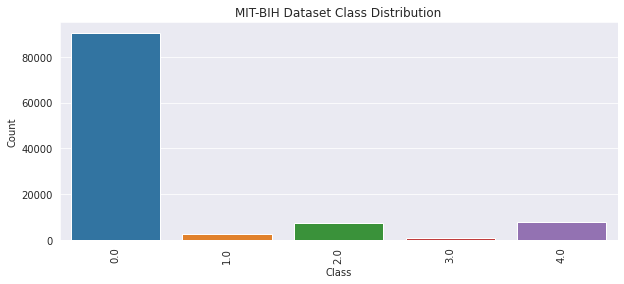

In [ ]:
# Examining The Dataset Class Distribution
matplotlib.pyplot.figure(figsize = (10, 4))
graph = seaborn.countplot(dataset[187])
matplotlib.pyplot.xlabel("Class")
matplotlib.pyplot.xticks(rotation = 90)
matplotlib.pyplot.ylabel("Count")
matplotlib.pyplot.title("MIT-BIH Dataset Class Distribution")
matplotlib.pyplot.show()

According to the graph above, the dataset is severely imbalanced with the "Normal Beat" class taking up most of the dataset. A resolution to this problem will be implemented later.

#Data Preprocessing

**Dividing The Dataset**

Dividing the dataset into 80% training, 10% validation, and 10% testing subsets with a stratified split to ensure the same class distribution across all datasets. Also with a random seed of 42 for reproduceability.

In [ ]:
# Dividing the Dataset into Training, Validation, and Testing Subsets
from sklearn import model_selection
training_dataset, testing_dataset = model_selection.train_test_split(dataset, test_size = 0.1, stratify = dataset[187], random_state = 42)
training_dataset, validation_dataset = model_selection.train_test_split(training_dataset, test_size = 0.1, stratify = training_dataset[187], random_state = 42)

**Examining the Training Dataset**

Verifying the number of samples in the training dataset, examining its class distribution, and resampling it to equal levels.

In [ ]:
# Examining Training Dataset 
print("Training Dataset is {} samples out of the entire dataset's {} samples, or {}% of the entire dataset.".format(len(training_dataset), len(dataset), int(100 * len(training_dataset) / len(dataset))))

Training Dataset is 88650 samples out of the entire dataset's 109446 samples, or 80% of the entire dataset.


In [ ]:
# Examining The Training Dataset Class Distribution
print("Training Dataset Class Distribution:\n\n{}".format(training_dataset[187].value_counts()))

Training Dataset Class Distribution:

0.0    73376
4.0     6511
2.0     5861
1.0     2251
3.0      651
Name: 187, dtype: int64


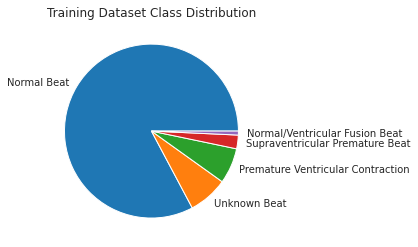

In [ ]:
# Visualizing The Training Dataset Class Distribution
matplotlib.pyplot.figure() 
matplotlib.pyplot.pie(training_dataset[187].value_counts(), labels = ["Normal Beat", "Unknown Beat", "Premature Ventricular Contraction", "Supraventricular Premature Beat", "Normal/Ventricular Fusion Beat"])
matplotlib.pyplot.title("Training Dataset Class Distribution")
matplotlib.pyplot.show()  

In [ ]:
# Resampling The Training Dataset
df_1 = training_dataset[training_dataset[187] == 1]
df_2 = training_dataset[training_dataset[187] == 2]
df_3 = training_dataset[training_dataset[187] == 3]
df_4 = training_dataset[training_dataset[187] == 4]
df_0 = (training_dataset[training_dataset[187] == 0]).sample(n = 20000, random_state = 42)

df_1_upsample = sklearn.utils.resample(df_1, replace = True, n_samples = 20000, random_state = 42)
df_2_upsample = sklearn.utils.resample(df_2, replace = True, n_samples = 20000, random_state = 42)
df_3_upsample = sklearn.utils.resample(df_3, replace = True, n_samples = 20000, random_state = 42)
df_4_upsample = sklearn.utils.resample(df_4, replace = True, n_samples = 20000, random_state = 42)

training_dataset = pandas.concat([df_0, df_1_upsample, df_2_upsample, df_3_upsample, df_4_upsample])

In [ ]:
# Examining The Updated Training Dataset Class Distribution
print("Updated Training Dataset Class Distribution:\n\n{}".format(training_dataset[187].value_counts()))

Updated Training Dataset Class Distribution:

1.0    20000
3.0    20000
4.0    20000
2.0    20000
0.0    20000
Name: 187, dtype: int64


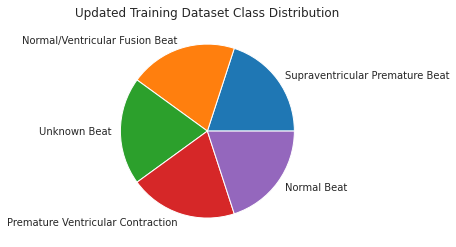

In [ ]:
# Visualizing The Updated Training Dataset Class Distribution
matplotlib.pyplot.figure() 
matplotlib.pyplot.pie(training_dataset[187].value_counts(), labels = ["Supraventricular Premature Beat", "Normal/Ventricular Fusion Beat", "Unknown Beat", "Premature Ventricular Contraction", "Normal Beat"])
matplotlib.pyplot.title("Updated Training Dataset Class Distribution")
matplotlib.pyplot.show()  

**Examining the Validation Dataset**

Verifying the number of samples in the validation dataset and examining its class distribution.

In [ ]:
import math

In [ ]:
# Examining Validation Dataset
print("Validation Dataset is {} samples out of the entire dataset's {} samples, or {}% of the entire dataset.".format(len(validation_dataset), len(dataset), int(100 * len(validation_dataset) / len(dataset))))

Validation Dataset is 9851 samples out of the entire dataset's 109446 samples, or 9% of the entire dataset.


In [ ]:
# Examining The Validation Data Class Distribution
print("Validation Dataset Class Distribution:\n\n{}".format(validation_dataset[187].value_counts()))

Validation Dataset Class Distribution:

0.0    8154
4.0     724
2.0     651
1.0     250
3.0      72
Name: 187, dtype: int64


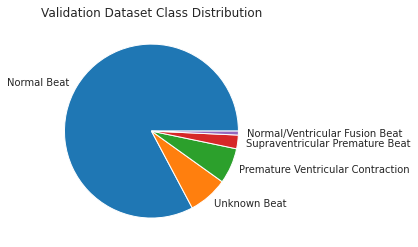

In [ ]:
# Visualizing The Validation Dataset Class Distribution
matplotlib.pyplot.figure()  
matplotlib.pyplot.pie(validation_dataset[187].value_counts(), labels = ["Normal Beat", "Unknown Beat", "Premature Ventricular Contraction", "Supraventricular Premature Beat", "Normal/Ventricular Fusion Beat"])
matplotlib.pyplot.title("Validation Dataset Class Distribution")
matplotlib.pyplot.show()  

**Examining the Testing Dataset**

Verifying the number of samples in the testing dataset and examining its class distribution.

In [ ]:
# Examining Testing Dataset
print("Testing Dataset is {} samples out of the entire dataset's {} samples, or {}% of the entire dataset.".format(len(testing_dataset), len(dataset), int(100 * len(testing_dataset) / len(dataset))))

Testing Dataset is 10945 samples out of the entire dataset's 109446 samples, or 10% of the entire dataset.


In [ ]:
# Examining The Testing Dataset Class Distribution
print("Testing Dataset Class Distribution:\n\n{}".format(testing_dataset[187].value_counts()))

Testing Dataset Class Distribution:

0.0    9059
4.0     804
2.0     724
1.0     278
3.0      80
Name: 187, dtype: int64


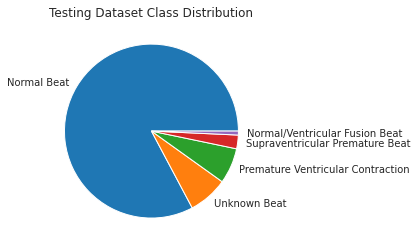

In [ ]:
# Visualizing The Testing Dataset Class Distribution
matplotlib.pyplot.figure()  
matplotlib.pyplot.pie(testing_dataset[187].value_counts(), labels = ["Normal Beat", "Unknown Beat", "Premature Ventricular Contraction", "Supraventricular Premature Beat", "Normal/Ventricular Fusion Beat"])
matplotlib.pyplot.title("Testing Dataset Class Distribution")
matplotlib.pyplot.show()  

**Preprocessing the Training, Validation, and Testing Datasets**

Converting the input's of the training, validation, and testing datasets to Numpy array's and transforming the output labels to one-hot vectorized representation's.

In [ ]:
# Splitting The Training, Validation, and Testing Datasets Into Input and Output Arrays
X_train = numpy.array(training_dataset.iloc[:, :187])
X_val = numpy.array(validation_dataset.iloc[:, :187])
X_test = numpy.array(testing_dataset.iloc[:, :187])

y_train = numpy.array(tensorflow.keras.utils.to_categorical(training_dataset[187]))
y_val = numpy.array(tensorflow.keras.utils.to_categorical(validation_dataset[187]))
y_test = numpy.array(tensorflow.keras.utils.to_categorical(testing_dataset[187]))

**Visualizing Normal Beats**

Graphing five samples of Normal Beats.

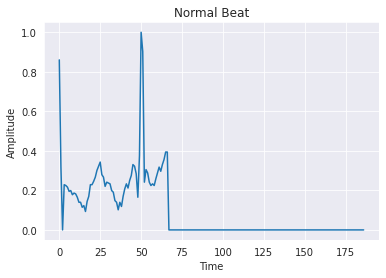

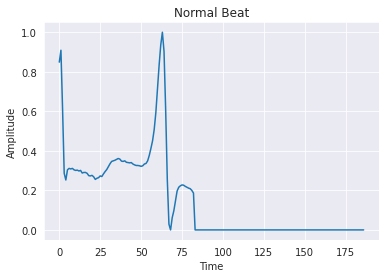

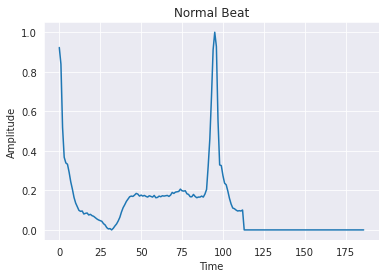

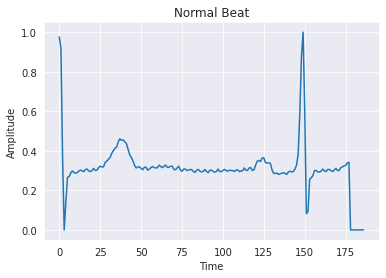

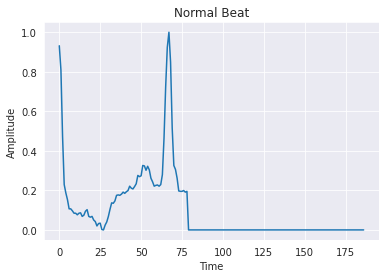

In [ ]:
# Visualizing Normal Beats
num = 0
for i in range(5):
  matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(X_train[num])
  matplotlib.pyplot.xlabel("Time")
  matplotlib.pyplot.ylabel("Amplitude")
  matplotlib.pyplot.title("Normal Beat")
  matplotlib.pyplot.show()
  num += 1000

**Visualizing Supraventricular Premature Beats**

Graphing five samples of Supraventricular Premature Beats.

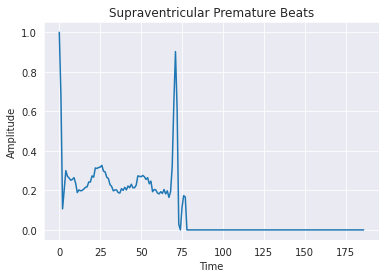

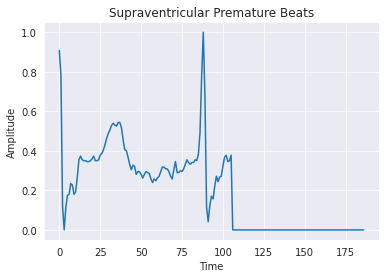

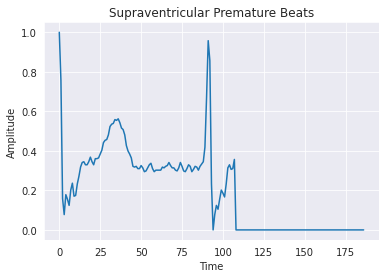

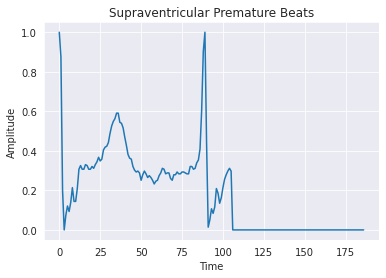

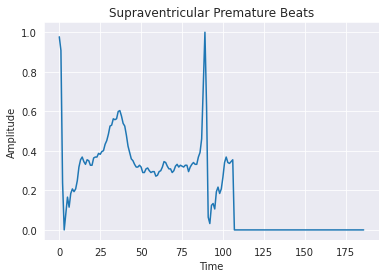

In [ ]:
# Visualizing Supraventricular Premature Beats
num = 20000
for i in range(5):
  matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(X_train[num])
  matplotlib.pyplot.xlabel("Time")
  matplotlib.pyplot.ylabel("Amplitude")
  matplotlib.pyplot.title("Supraventricular Premature Beats")
  matplotlib.pyplot.show()
  num += 1000

**Visualizing Premature Ventricular Contraction**

Graphing five samples of Premature Ventricular Contraction.

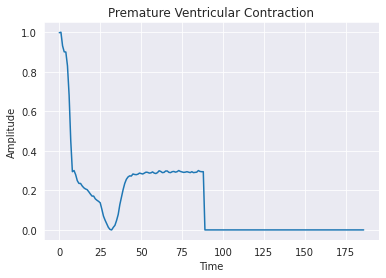

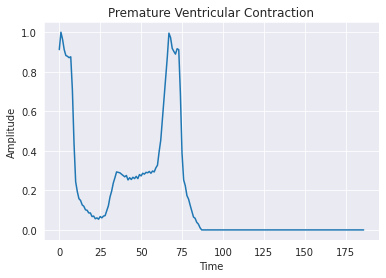

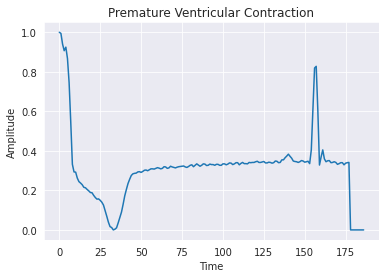

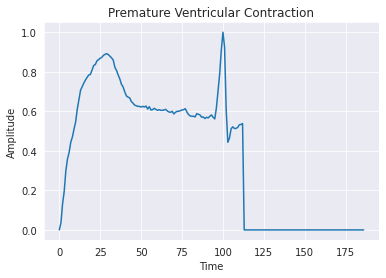

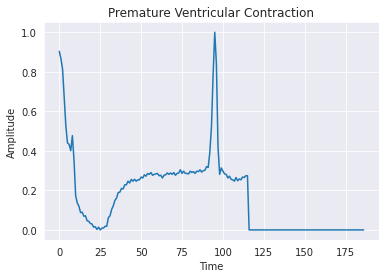

In [ ]:
# Visualizing Premature Ventricular Contraction 
num = 40000
for i in range(5):
  matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(X_train[num])
  matplotlib.pyplot.xlabel("Time")
  matplotlib.pyplot.ylabel("Amplitude")
  matplotlib.pyplot.title("Premature Ventricular Contraction")
  matplotlib.pyplot.show()
  num += 1000

**Visualizing Normal/Ventricular Fusion Beat**

Graphing five samples of Normal/Ventricular Fusion Beats.

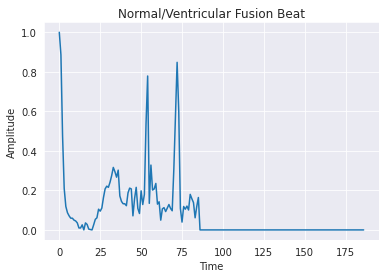

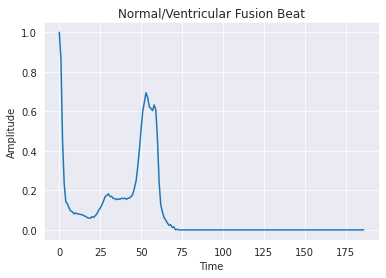

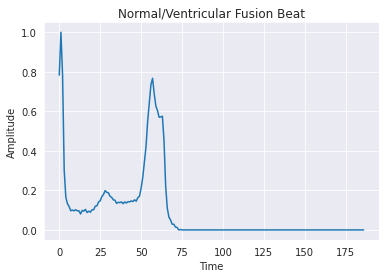

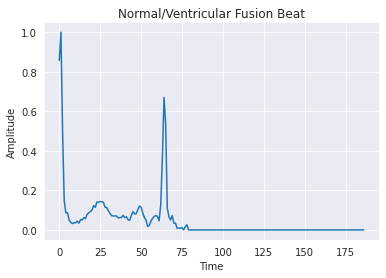

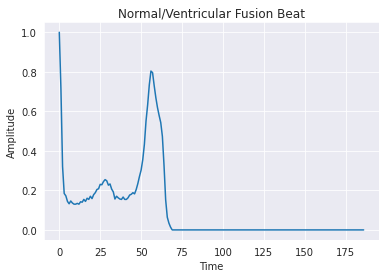

In [ ]:
# Visualizing Normal/Ventricular Fusion Beat
num = 60000
for i in range(5):
  matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(X_train[num])
  matplotlib.pyplot.xlabel("Time")
  matplotlib.pyplot.ylabel("Amplitude")
  matplotlib.pyplot.title("Normal/Ventricular Fusion Beat")
  matplotlib.pyplot.show()
  num += 1000

**Visualizing Unknown Beats**

Graphing five samples of Unknown Beats.

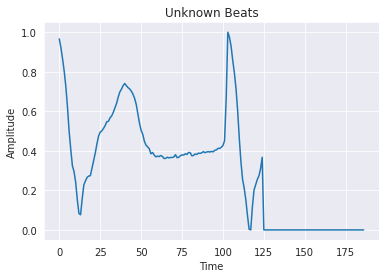

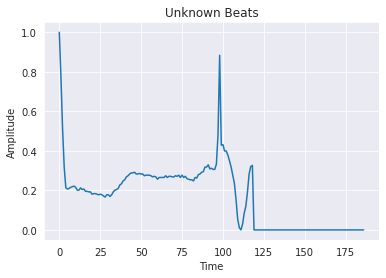

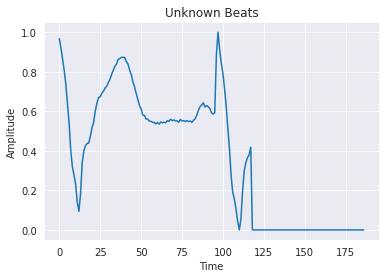

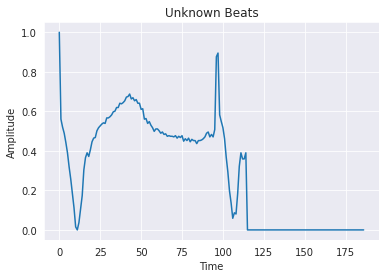

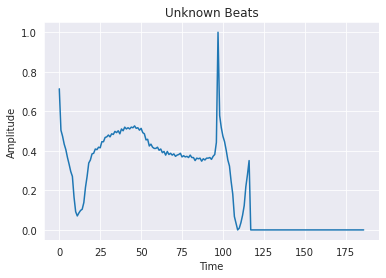

In [ ]:
# Visualizing Unknown Beats
num = 80000
for i in range(5):
  matplotlib.pyplot.figure()
  matplotlib.pyplot.plot(X_train[num])
  matplotlib.pyplot.xlabel("Time")
  matplotlib.pyplot.ylabel("Amplitude")
  matplotlib.pyplot.title("Unknown Beats")
  matplotlib.pyplot.show()
  num += 1000

**Data Augmentation**

Augmenting the training dataset using random noise injection.

In [ ]:
def random_float(low, high):
  return random.random() * (high - low) + low

In [ ]:
NOISE_INTENSITY = 0.025

def add_noise(signal):
  noise = numpy.random.normal(0, random_float(0.0, NOISE_INTENSITY), 187)
  return (signal + noise)

In [ ]:
# Adding Noise To The Training Data To Prevent Overfitting
augmented_X_train = []

for signal in X_train.tolist():
  augmented_X_train.append(add_noise(signal))

**Visualizing Augmented Normal Beats**

Comparing a regular sample of Normal Beat to the augmented version of that same Normal Beat sample.

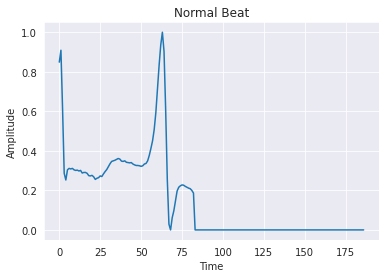

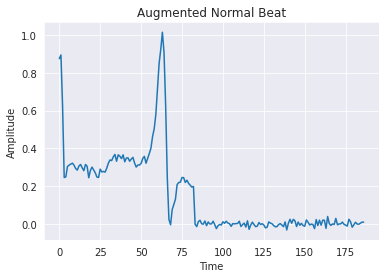

In [ ]:
# Visualizing Augmented Normal Beats
matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[1000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Normal Beat")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(augmented_X_train[1000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Normal Beat")
matplotlib.pyplot.show()

**Visualizing Augmented Supraventricular Premature Beats**

Comparing a regular sample of Normal Beat to the augmented version of that same Supraventricular Premature Beats sample.

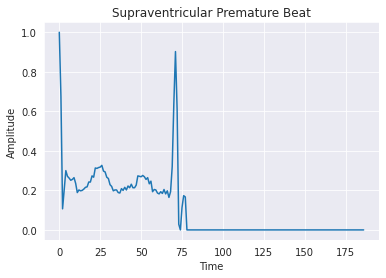

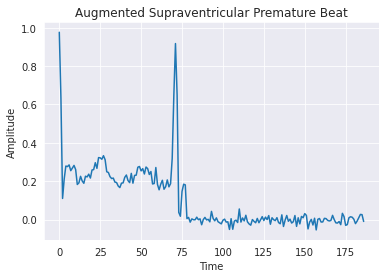

In [ ]:
# Visualizing Supraventricular Premature Beats
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[20000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Supraventricular Premature Beat")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(augmented_X_train[20000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Supraventricular Premature Beat")
matplotlib.pyplot.show()

**Visualizing Augmented Premature Ventricular Contraction**

Comparing a regular sample of Normal Beat to the augmented version of that same Premature Ventricular Contraction  sample.

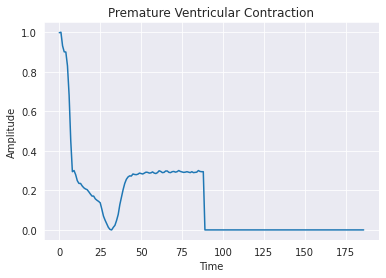

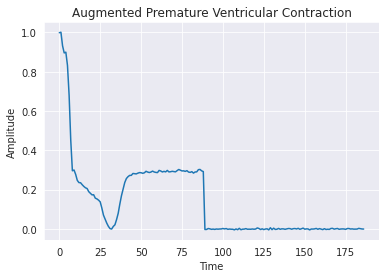

In [ ]:
# Visualizing Augmented Premature Ventricular Contraction
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[40000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Premature Ventricular Contraction")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(augmented_X_train[40000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Premature Ventricular Contraction")
matplotlib.pyplot.show()

**Visualizing Augmented Normal/Ventricular Fusion Beats**

Comparing a regular sample of Normal Beat to the augmented version of that same Normal/Ventricular Fusion Beats sample.

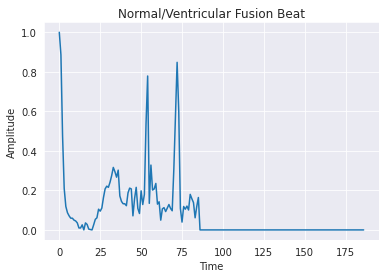

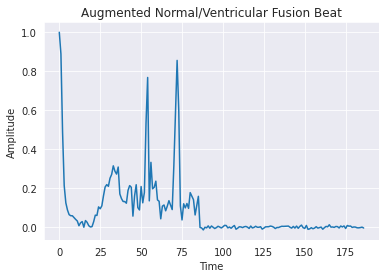

In [ ]:
# Visualizing Augmented Normal/Ventricular Fusion Beats
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[60000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Normal/Ventricular Fusion Beat")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(augmented_X_train[60000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Normal/Ventricular Fusion Beat")
matplotlib.pyplot.show()

**Visualizing Augmented Unknown Beats**

Comparing a regular sample of Unknown Beat to the augmented version of that same Unknown Beat sample.

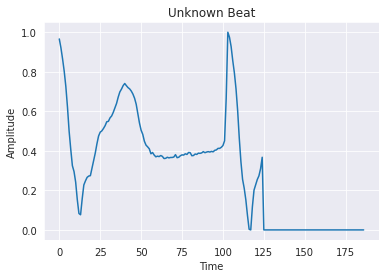

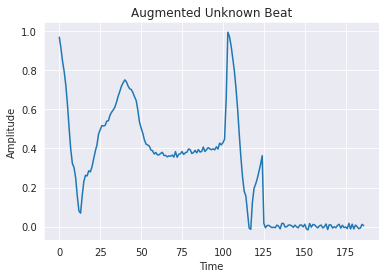

In [ ]:
# Visualizing Augmented Unknown Beats
matplotlib.pyplot.figure()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(X_train[80000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Unknown Beat")
matplotlib.pyplot.show()

matplotlib.pyplot.subplot()
matplotlib.pyplot.plot(augmented_X_train[80000])
matplotlib.pyplot.xlabel("Time")
matplotlib.pyplot.ylabel("Amplitude")
matplotlib.pyplot.title("Augmented Unknown Beat")
matplotlib.pyplot.show()

In [ ]:
X_train, y_train = sklearn.utils.shuffle(X_train, y_train, random_state = 42)

#Model Building

Using convolutional layers and max-pooling layers to build the 1-D CNN.

In [ ]:
inp = Input(shape=(187, 1))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S11)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=inp, outputs=A7)

model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 187, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_154 (Conv1D)             (None, 183, 32)      192         input_15[0][0]                   
__________________________________________________________________________________________________
conv1d_155 (Conv1D)             (None, 183, 32)      5152        conv1d_154[0][0]                 
__________________________________________________________________________________________________
activation_153 (Activation)     (None, 183, 32)      0           conv1d_155[0][0]                 
___________________________________________________________________________________________

Defining the Adam optimizer with an initial learning rate of 0.0001

In [ ]:
adam = tensorflow.keras.optimizers.Adam(learning_rate = 0.0001)

Compiling the model with the optimizer, loss, and accuracy metric.

In [ ]:
def top_3_accuracy(y_true, y_pred):
  return tensorflow.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k = 3)

def top_2_accuracy(y_true, y_pred):
  return tensorflow.keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k = 2)

def top_1_accuracy(y_true, y_pred):
  return tensorflow.keras.metrics.categorical_accuracy(y_true, y_pred)

In [ ]:
# Compiling The Model
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = [top_3_accuracy, top_2_accuracy, top_1_accuracy])

#Model Training


Using a ReduceLRonPlateau callback to reduce the learning rate on a stagnant training phase and an EarlyStopping callback to completely halt training once the examined loss metric has stopped being minimized.

In [ ]:
callbacks = [
             tensorflow.keras.callbacks.ReduceLROnPlateau(monitor = "val_top_1_accuracy", patience = 3, mode = "max"),
             tensorflow.keras.callbacks.EarlyStopping(monitor = "val_top_1_accuracy", patience = 10, mode = "max", restore_best_weights = True)
]

Training the model for 100 epochs and a default batch size.

In [ ]:
# Optimizing The Model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, callbacks = callbacks)

Epoch 1/100
3125/3125 [==============================] - 18s 5ms/step - loss: 0.7478 - top_3_accuracy: 0.9422 - top_2_accuracy: 0.8690 - top_1_accuracy: 0.7273 - val_loss: 0.5230 - val_top_3_accuracy: 0.9875 - val_top_2_accuracy: 0.9525 - val_top_1_accuracy: 0.8081
Epoch 2/100
3125/3125 [==============================] - 17s 5ms/step - loss: 0.3093 - top_3_accuracy: 0.9873 - top_2_accuracy: 0.9687 - top_1_accuracy: 0.8912 - val_loss: 0.2658 - val_top_3_accuracy: 0.9931 - val_top_2_accuracy: 0.9801 - val_top_1_accuracy: 0.9105
Epoch 3/100
3125/3125 [==============================] - 17s 5ms/step - loss: 0.2423 - top_3_accuracy: 0.9920 - top_2_accuracy: 0.9788 - top_1_accuracy: 0.9159 - val_loss: 0.2644 - val_top_3_accuracy: 0.9957 - val_top_2_accuracy: 0.9854 - val_top_1_accuracy: 0.9047
Epoch 4/100
3125/3125 [==============================] - 17s 5ms/step - loss: 0.1992 - top_3_accuracy: 0.9941 - top_2_accuracy: 0.9840 - top_1_accuracy: 0.9304 - val_loss: 0.2446 - val_top_3_accuracy: 0

#Model Evaluation

Visualizing training loss.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


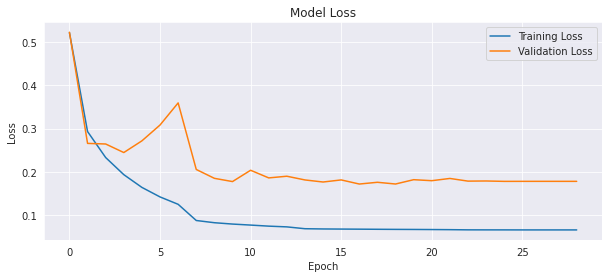

In [ ]:
# Visualizing The Validation Loss for DNN
matplotlib.pyplot.figure(figsize = (10, 4))
seaborn.lineplot(model.history.epoch, model.history.history["loss"], label = "Training Loss")
seaborn.lineplot(model.history.epoch, model.history.history["val_loss"], label = "Validation Loss")
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Loss")
matplotlib.pyplot.title("Model Loss")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

Visualizing training accuracy.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


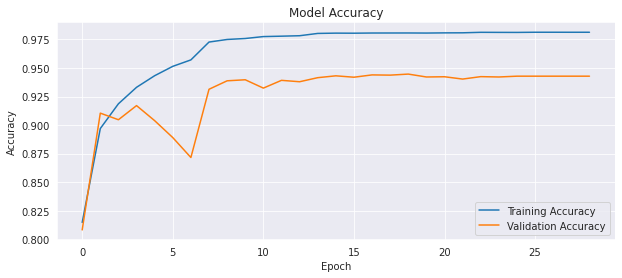

In [ ]:
# Visualizing The Validation Loss for DNN
matplotlib.pyplot.figure(figsize = (10, 4))
seaborn.lineplot(model.history.epoch, model.history.history["top_1_accuracy"], label = "Training Accuracy")
seaborn.lineplot(model.history.epoch, model.history.history["val_top_1_accuracy"], label = "Validation Accuracy")
matplotlib.pyplot.xlabel("Epoch")
matplotlib.pyplot.ylabel("Accuracy")
matplotlib.pyplot.title("Model Accuracy")
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

Determining the training accuracy.

In [ ]:
# Testing The DNN
model.evaluate(X_train, y_train)

3125/3125 [==============================] - 10s 3ms/step - loss: 0.0664 - top_3_accuracy: 0.9992 - top_2_accuracy: 0.9970 - top_1_accuracy: 0.9807


[0.06643356382846832,
 0.9991700053215027,
 0.9970300197601318,
 0.980650007724762]

Determining the validation accuracy.

In [ ]:
# Testing The DNN
model.evaluate(X_val, y_val)

308/308 [==============================] - 1s 3ms/step - loss: 0.1718 - top_3_accuracy: 0.9977 - top_2_accuracy: 0.9906 - top_1_accuracy: 0.9447


[0.17175327241420746,
 0.9976652264595032,
 0.9905593395233154,
 0.9446756839752197]

Determining the testing accuracy.

In [ ]:
model.evaluate(X_test, y_test)

343/343 [==============================] - 1s 3ms/step - loss: 0.1581 - top_3_accuracy: 0.9978 - top_2_accuracy: 0.9923 - top_1_accuracy: 0.9520


[0.1581038236618042,
 0.9978072047233582,
 0.9923252463340759,
 0.9520328640937805]

Visualizing confusion matrix.

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize,
                          title='Confusion matrix',
                          cmap=matplotlib.pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    matplotlib.pyplot.imshow(cm, interpolation='nearest', cmap=cmap)
    matplotlib.pyplot.title(title)
    matplotlib.pyplot.colorbar()
    tick_marks = numpy.arange(len(classes))
    matplotlib.pyplot.xticks(tick_marks, classes, rotation=90)
    matplotlib.pyplot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        matplotlib.pyplot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.ylabel('True Label')
    matplotlib.pyplot.xlabel('Predicted Label')

Normalized confusion matrix


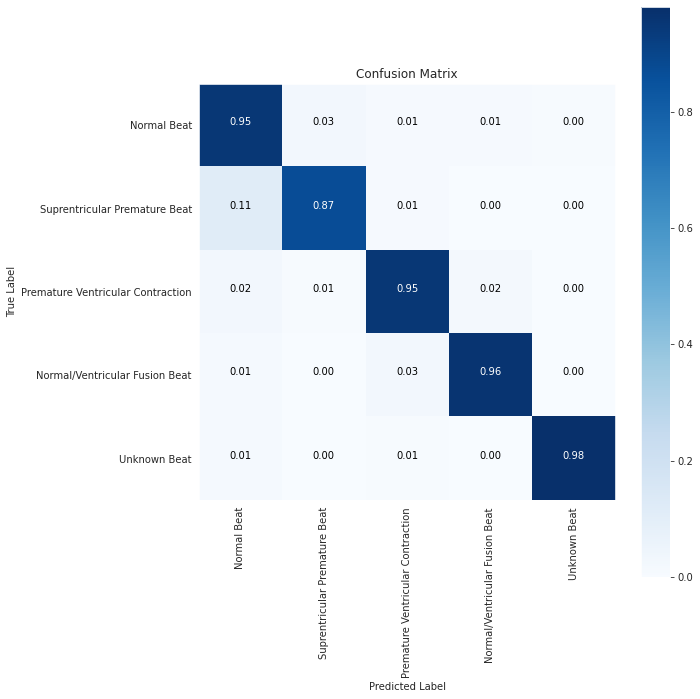

In [ ]:
cnf_matrix = sklearn.metrics.confusion_matrix(y_test.argmax(axis=1), model.predict(X_test).argmax(axis=1))

matplotlib.pyplot.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, normalize = True, classes=['Normal Beat', 'Suprentricular Premature Beat', 'Premature Ventricular Contraction', 'Normal/Ventricular Fusion Beat', 'Unknown Beat'],
                      title='Confusion Matrix')
matplotlib.pyplot.grid(False)
matplotlib.pyplot.show()

Examining precision, recall, and f1-score.

In [ ]:
print("Classification Report:\n{}".format(sklearn.metrics.classification_report(y_test.argmax(axis = 1), model.predict(X_test).argmax(axis = 1))))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      9059
           1       0.50      0.87      0.63       278
           2       0.89      0.95      0.92       724
           3       0.43      0.96      0.60        80
           4       0.95      0.98      0.97       804

    accuracy                           0.95     10945
   macro avg       0.75      0.94      0.82     10945
weighted avg       0.97      0.95      0.96     10945



In [ ]:
def plot_weights(layer):
  weights = layer.get_weights()[0][:, :, 0].squeeze()
  matplotlib.pyplot.imshow(weights, cmap = "gray")

Below are the visualizations of filters for each convolutional layer in the network. Essentially, I gather the optimized weights for each of the 5-sized kernels in the convolutional layers and plot them. Intuitively, the earlier layers will extract simpler features, while the later layers will build on top of that knowledge and extract more advanced features pertaining to the input ECG signal.

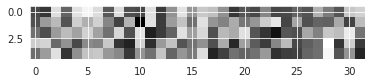

In [ ]:
plot_weights(layer = model.layers[2])

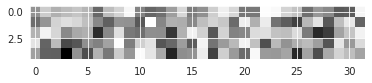

In [ ]:
plot_weights(layer = model.layers[4])

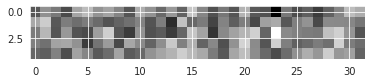

In [ ]:
plot_weights(layer = model.layers[8])

Support for 1D saliency maps is currently limited with keras-vis, but will be implemented when documentation is available. Ideally, the tool will measure the gradient's of the output layers with respect to the input and map that on a heatmap. Intuitively, you're measuring the sensitivity of the output predictions to various regions in the image and then localizing/highlighting those features. The patient's ECG signal can now be highlighted in the areas that are influencing the prediction most and require a doctor to examine that particular location in the input more specifically, thus reducing the amount of time a doctor needs to spend interpreting the signal.

In [ ]:
# Saving The Model
model.save("MIT-BIH_Model.h5")